🔹 Gradient Boosting
MAE: 0.563782757617282
MSE: 0.7722714478224972
R²: 0.9664748490691754
------------------------------
🔹 Linear Regression
MAE: 1.2147329896536767
MSE: 3.537020423742785
R²: 0.8464540623821679
------------------------------
🔹 Ridge
MAE: 1.2135075753502118
MSE: 3.519676539792186
R²: 0.8472069794151749
------------------------------
🔹 Lasso
MAE: 1.4346554193911325
MSE: 4.528159181141205
R²: 0.8034276413887955
------------------------------
🔹 Decision Tree
MAE: 0.6640983606557376
MSE: 1.1185426229508197
R²: 0.951442837408116
------------------------------
🔹 Random Forest
MAE: 0.7284728922795571
MSE: 1.3186760350172593
R²: 0.9427548263923695
------------------------------


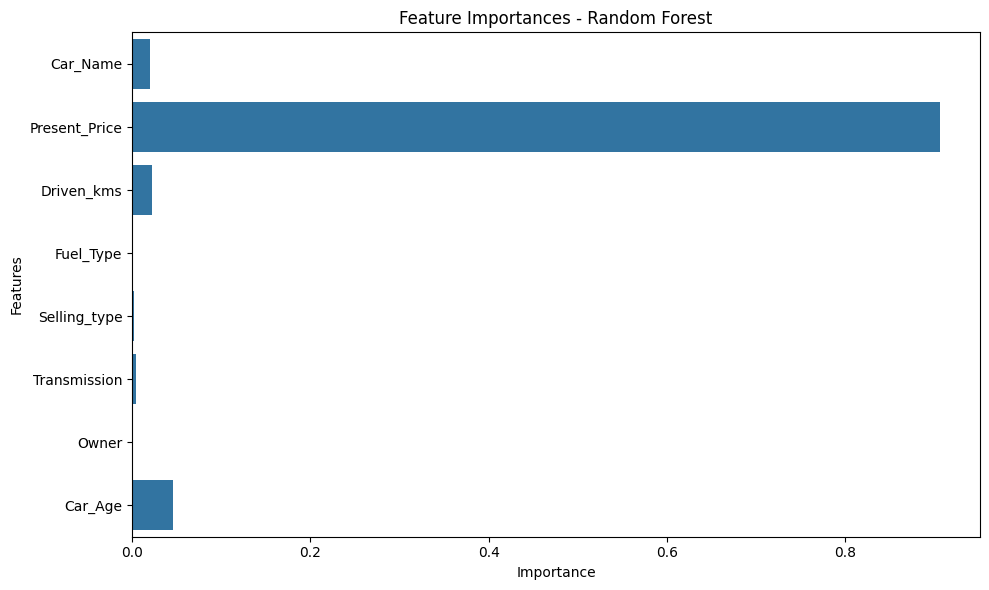

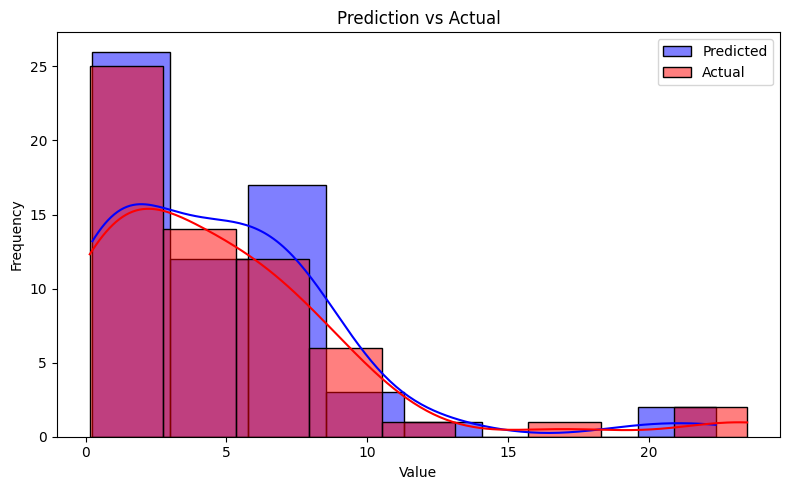

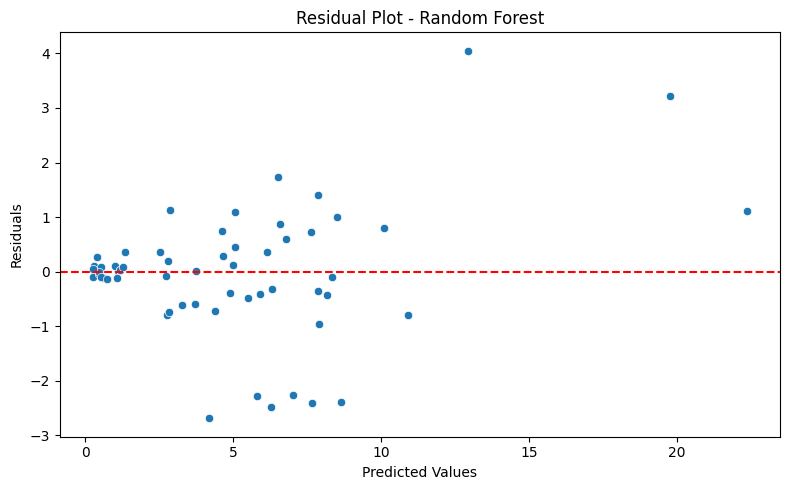

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# Load data
df = pd.read_csv('car data.csv')

# Clean and Encode
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Selling_type'] = df['Selling_type'].map({'Dealer': 0, 'Individual': 1})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
df['Owner'] = df['Owner'].astype(int)
df['Car_Name'] = LabelEncoder().fit_transform(df['Car_Name'])

# Feature Engineering
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

# Features & Target
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def evaluate_model(model, name='Model'):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f"🔹 {name}")
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R²:", r2_score(y_test, predictions))
    print("-" * 30)
    return r2_score(y_test, predictions)

#
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),

    # 🔽 Random Forest less Overfitting
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42
    )
}

gb_model = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_model, "Gradient Boosting")



#
for name, model in models.items():
    evaluate_model(model, name)

# 🔸 the best module Random Forest
best_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)

#
importances = best_model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#
plt.figure(figsize=(8, 5))
sns.histplot(pred, color='blue', label='Predicted', kde=True)
sns.histplot(y_test, color='red', label='Actual', kde=True)
plt.legend()
plt.title("Prediction vs Actual")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# (Residual Plot)
residuals = y_test - pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()